## Chris's ML - L4/5 Home work
#### Iris dataset
	○ Determine issue with one classification

# Application of Neural Network over Iris Dataset

## Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Load the Iris Data Set

In [2]:
iris = datasets.load_iris()
X = iris.data
y = np.atleast_2d(iris.target).T
print((X.shape))
print((y.shape))
print(iris.target)
#print(len(X[0]))
print(X.dtype)

(150, 4)
(150, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
float64


In [3]:
np.set_printoptions(precision=4, suppress=True)

In [4]:
#Change the label to one hot vector
import tensorflow as tf

'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
print("Before one Hot Encoding, Shape of y",y.shape)
print(y[:5])

y = tf.keras.utils.to_categorical(y, num_classes=3)

print("After one Hot Encoding, Shape of y",y.shape)
print(y)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Before one Hot Encoding, Shape of y (150, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
After one Hot Encoding, Shape of y (150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0

# Define Functions

In [5]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [6]:
def feedforward(X):
    z_h = np.dot(X, w01)
    a_h = sigmoid(z_h)

    z_o = np.dot(a_h, w12)
    a_o = sigmoid(z_o)
    return(a_o,a_h)

# Define Parameters

In [7]:
# Learning Rate
eta = 0.01

# Number of epochs for learning
epochs = 2000

# Number of Hidden Neurons
hidden = 10

# Initialize the weights

In [8]:
# numpy.random.randn generates samples from the normal distribution, while numpy.random.rand 
# from unifrom (in range [0,1)).

# Second, why uniform distribution didn't work? The main reason in this is activation function,
# especially in your case where you use sigmoid function. The plot of the sigmoid looks like 
# following:

# So you can see that if your input is away from 0, the slope of the function decreases quite 
# fast and as a result you get a tiny gradient and tiny weight update. And if you have many 
# layers - those gradients get multiplied many times in the back pass, so even "proper" 
# gradients after multiplications become small and stop making any influence. So if you have 
# a lot of weights which bring your input to those regions you network is hardly trainable. 
# That's why it is a usual practice to initialize network variables around zero value. This 
# is done to ensure that you get reasonable gradients (close to 1) to train your net.

# However, uniform distribution is not something completely undesirable, you just need to make
# the range smaller and closer to zero. As one of good practices is using Xavier 
# initialization. In this approach you can initialize your weights with:

#1) Normal distribution. Where mean is 0 and var = sqrt(2. / (in + out)), where in - is the 
# number of inputs to the neurons and out - number of outputs.

#2)Unifrom distribution in range [-sqrt(6. / (in + out)), +sqrt(6. / (in + out))]

# numpy.random.random(size=None)
# Return random floats in the half-open interval [0.0, 1.0).
# Results are from the “continuous uniform” distribution. 
# E.g. [0.0,1.0) means greater than or equal to 0.0 and less than 1.0

# numpy.random.randn(d0, d1, ..., dn)
# Return a sample (or samples) from the “standard normal” distribution.

# If positive, int_like or int-convertible arguments are provided, randn generates an array 
# of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” 
#(Gaussian) distribution of mean 0 and variance 1 (if any of the d_i are floats, they are 
# first converted to integers by truncation). A single float randomly sampled from the 
# distribution is returned if no argument is provided.

In [9]:
w01 = np.random.random((len(X[0]), hidden)) # Provide value between 
w12 = np.random.random((hidden, 3)) 

# Let's try to reduce the weight 
w01 = np.true_divide(w01, 3)
w12 = np.true_divide(w12, 3)

#w01 = np.random.randn(len(X[0]), hidden)
#w12 = np.random.randn(hidden, 3) 

print(w01.shape)
print(w12.shape)

(4, 10)
(10, 3)


# Start feeding forward and backpropagate *epochs* times.

In [10]:
error_total=[]
error_total0=[]
error_total1=[]
error_total2=[]

for epoch in range(epochs):
    a_o, a_h = feedforward(X)
    
    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
    #print(sum(a_o_error[50:100,]))
    #output(150,3)
    
    a_o_err_y = np.concatenate((a_o_error,y), axis=1)
    #print (a_o_err_y[:,4])
    
    #a_o_err_y0 = a_o_err_y[a_o_err_y[:,3]==1][:,0]
    #a_o_err_y1 = a_o_err_y[a_o_err_y[:,4]==1][:,1]
    #a_o_err_y2 = a_o_err_y[a_o_err_y[:,5]==1][:,2]
    a_o_err_y0 = a_o_err_y[:,0]
    a_o_err_y1 = a_o_err_y[:,1]
    a_o_err_y2 = a_o_err_y[:,2]
    
    error_total = np.append(error_total,sum(a_o_error))
    error_total0 = np.append(error_total0,sum(a_o_err_y0))
    error_total1 = np.append(error_total1,sum(a_o_err_y1))
    error_total2 = np.append(error_total2,sum(a_o_err_y2))
    
    # Backpropagation
    ## Output to Hidden Layer weights
    delta_a_o_error = a_o - y
    delta_z_o = sigmoid(a_o,derivative=True)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))

    ## Hidden to Input Layer weights
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    delta_z_h = sigmoid(a_h,derivative=True)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)

    # Adjust weights
    w01 = w01 - eta * delta_hidden_layer
    w12 = w12 - eta * delta_output_layer
    
    if (epoch % 100 == 0):
        print("Epoch: {0:}/{1:} Total Error {2:0.4f}".format(epoch,epochs,a_o_error.sum()))

Epoch: 0/2000 Total Error 101.5190
Epoch: 100/2000 Total Error 27.2239
Epoch: 200/2000 Total Error 21.3378
Epoch: 300/2000 Total Error 19.0263
Epoch: 400/2000 Total Error 13.3393
Epoch: 500/2000 Total Error 8.6628
Epoch: 600/2000 Total Error 6.4888
Epoch: 700/2000 Total Error 5.3960
Epoch: 800/2000 Total Error 4.7699
Epoch: 900/2000 Total Error 4.3783
Epoch: 1000/2000 Total Error 4.1148
Epoch: 1100/2000 Total Error 3.9266
Epoch: 1200/2000 Total Error 3.7855
Epoch: 1300/2000 Total Error 3.6757
Epoch: 1400/2000 Total Error 3.5874
Epoch: 1500/2000 Total Error 3.5146
Epoch: 1600/2000 Total Error 3.4532
Epoch: 1700/2000 Total Error 3.4005
Epoch: 1800/2000 Total Error 3.3546
Epoch: 1900/2000 Total Error 3.3140


In [11]:
#a_o_err_y[:,0]

# Show final total error, type contribution to error

In [12]:
#print(a_o_error.shape)
#print(a_o_err_y0)
#print (a_o_err_y[:,5])
#print(error_total.shape)

In [13]:
print("Type 0 error:{0:.4f}".format(a_o_err_y0.sum()))
print("Type 1 error:{0:.4f}".format(a_o_err_y1.sum()))
print("Type 2 error:{0:.4f}".format(a_o_err_y2.sum()))
print("Total error:{0:.4f}".format(a_o_error.sum()))

Type 0 error:0.0351
Type 1 error:1.7488
Type 2 error:1.6677
Total error:3.4516


# Plot error (SSE)

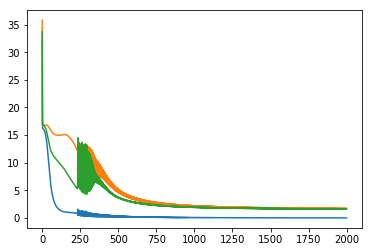

In [14]:
#plt.plot(error_total)
plt.plot(error_total0)
plt.plot(error_total1)
plt.plot(error_total2)

# Plot error (MSE)

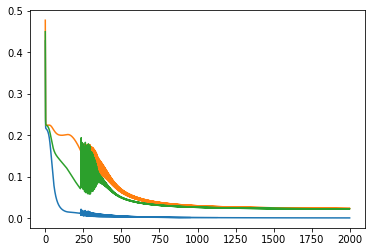

In [15]:
# Dividing by 75 instead of 150, as we already did 1/2 while calculating ""
# plt.plot(error_total)

plt.plot(error_total0/75)
plt.plot(error_total1/75)
plt.plot(error_total2/75)

# Show independent, dependent, predicted values

In [16]:
a_o, a_h = feedforward(X)

In [17]:
print(np.concatenate((y,a_o),axis=1))

[[1.     0.     0.     0.9752 0.0293 0.0006]
 [1.     0.     0.     0.972  0.037  0.0007]
 [1.     0.     0.     0.974  0.0323 0.0006]
 [1.     0.     0.     0.9707 0.038  0.0007]
 [1.     0.     0.     0.9754 0.0284 0.0006]
 [1.     0.     0.     0.9749 0.0278 0.0006]
 [1.     0.     0.     0.9738 0.0311 0.0006]
 [1.     0.     0.     0.974  0.0317 0.0006]
 [1.     0.     0.     0.9694 0.0413 0.0007]
 [1.     0.     0.     0.9722 0.0367 0.0007]
 [1.     0.     0.     0.9757 0.028  0.0006]
 [1.     0.     0.     0.9726 0.0335 0.0007]
 [1.     0.     0.     0.9723 0.037  0.0007]
 [1.     0.     0.     0.9742 0.0332 0.0006]
 [1.     0.     0.     0.9772 0.0248 0.0006]
 [1.     0.     0.     0.977  0.0235 0.0006]
 [1.     0.     0.     0.9765 0.0254 0.0006]
 [1.     0.     0.     0.975  0.0293 0.0006]
 [1.     0.     0.     0.9751 0.0285 0.0006]
 [1.     0.     0.     0.9755 0.0273 0.0006]
 [1.     0.     0.     0.9728 0.034  0.0006]
 [1.     0.     0.     0.9749 0.0282 0.0006]
 [1.     0

In [18]:
a_o = np.argmax(a_o, axis=1)

In [19]:
a_o[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
a_o[50:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
a_o[100:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

# Compute confusion matrix
### Classification Report (Precision/Recall)
- **Precision**: Focuses on your predictions. It is measuring what fraction of your predictions for the positive class are valid. It is formulated by (TP/TP+FP).
- **Recall**: Focuses on all of the possible positive classes. It's telling you how often your predictions actually capture the positive class. It is formulated by (TP/TP+FN).
- **F1-Score**: Tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall.
- **Support**: The support is the number of samples of the true response that lies in that class.


### So...Recall or Precision?

It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

What's the coset of having a FN and FP?

**Optimize Recall When:**
- You want to limit false negatives 
- You will get more False Positives
- When you want to peanlize FN more than FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit false positives 
- When you want to peanlize FP more than FN
- Example: Spam VS Not Spam


In [22]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(iris.target, a_o))

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


In [23]:
print (metrics.classification_report(iris.target, a_o))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [24]:
print("{0:0.3f}".format(metrics.accuracy_score(iris.target, a_o)))

0.973
